## Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.base import clone
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report,accuracy_score, recall_score, precision_score, f1_score, RocCurveDisplay
from matplotlib.gridspec import GridSpec
from tabulate import tabulate
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from IPython.display import clear_output

warnings.filterwarnings("ignore")

## Read_Data

In [ ]:
df = pd.read_csv('/content/Lumpy skin disease data.csv')

In [ ]:
df.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
print('The Shape Of Data Is ==> ', df.shape)

The Shape Of Data Is ==>  (24803, 20)


## Preprocessing

In [ ]:
df=df.drop(['region','country','reportingDate'],axis=1)
df.head()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
print('The Shape Of Data Is ==> ', df.shape)

The Shape Of Data Is ==>  (24803, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   cld                  24803 non-null  float64
 3   dtr                  24803 non-null  float64
 4   frs                  24803 non-null  float64
 5   pet                  24803 non-null  float64
 6   pre                  24803 non-null  float64
 7   tmn                  24803 non-null  float64
 8   tmp                  24803 non-null  float64
 9   tmx                  24803 non-null  float64
 10  vap                  24803 non-null  float64
 11  wet                  24803 non-null  float64
 12  elevation            24803 non-null  int64  
 13  dominant_land_cover  24803 non-null  int64  
 14  X5_Ct_2010_Da        24803 non-null  float64
 15  X5_Bf_2010_Da        24803 non-null 

In [ ]:
df.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [ ]:
df.isnull().sum()

,0
x,0
y,0
cld,0
dtr,0
frs,0
pet,0
pre,0
tmn,0
tmp,0
tmx,0


In [ ]:
df['lumpy'].value_counts()

,count
lumpy,
0,21764
1,3039


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
24798,False
24799,False
24800,False
24801,False


## Visulaization

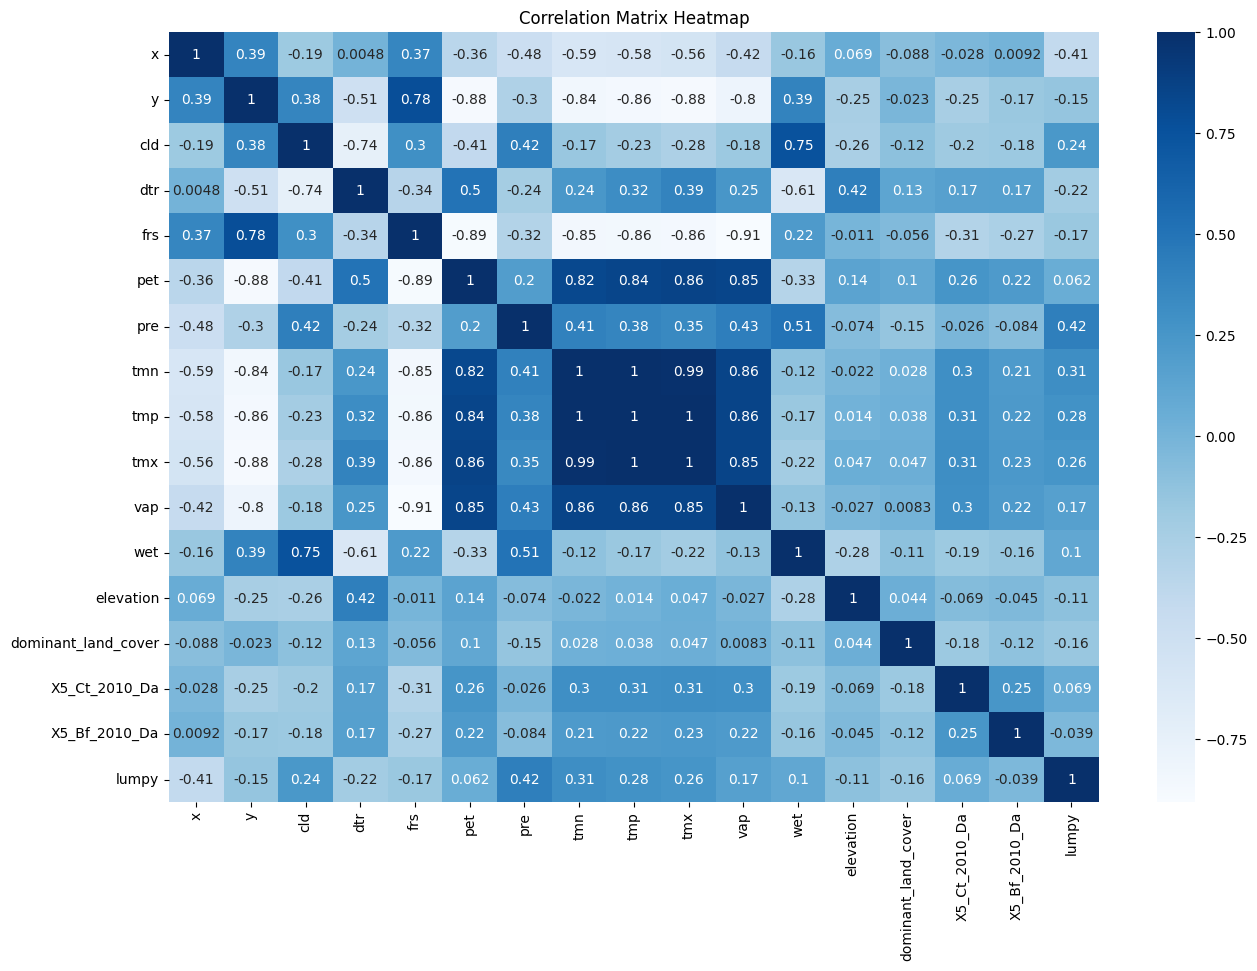

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
corr_matrix

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
x,1.000000,0.387501,-0.187324,0.004775,0.370836,-0.358457,-0.478733,-0.594490,-0.580375,-0.563327,-0.424080,-0.164079,0.069367,-0.087905,-0.028277,0.009231,-0.408407
y,0.387501,1.000000,0.375184,-0.508181,0.783018,-0.879845,-0.295240,-0.839350,-0.861948,-0.878246,-0.804888,0.392614,-0.247528,-0.022575,-0.248816,-0.173256,-0.146576
cld,-0.187324,0.375184,1.000000,-0.738746,0.295737,-0.406114,0.424070,-0.167758,-0.225039,-0.278082,-0.177241,0.749386,-0.262220,-0.116746,-0.197311,-0.177610,0.237754
dtr,0.004775,-0.508181,-0.738746,1.000000,-0.338221,0.503055,-0.235839,0.241513,0.318798,0.390182,0.252225,-0.611676,0.422791,0.126460,0.165909,0.168894,-0.216253
frs,0.370836,0.783018,0.295737,-0.338221,1.000000,-0.888834,-0.316535,-0.853125,-0.861009,-0.863749,-0.905936,0.217203,-0.011161,-0.056338,-0.310945,-0.270867,-0.172834
pet,-0.358457,-0.879845,-0.406114,0.503055,-0.888834,1.000000,0.195620,0.821891,0.844336,0.860752,0.845909,-0.330310,0.138186,0.103978,0.257481,0.218159,0.061748
pre,-0.478733,-0.295240,0.424070,-0.235839,-0.316535,0.195620,1.000000,0.406589,0.377515,0.347758,0.428686,0.507761,-0.073501,-0.147926,-0.026248,-0.084029,0.419686
tmn,-0.594490,-0.839350,-0.167758,0.241513,-0.853125,0.821891,0.406589,1.000000,0.996758,0.987715,0.855783,-0.122820,-0.022032,0.028129,0.300226,0.213895,0.308560
tmp,-0.580375,-0.861948,-0.225039,0.318798,-0.861009,0.844336,0.377515,0.996758,1.000000,0.997084,0.856606,-0.170648,0.013571,0.037915,0.306956,0.222844,0.283436
tmx,-0.563327,-0.878246,-0.278082,0.390182,-0.863749,0.860752,0.347758,0.987715,0.997084,1.000000,0.852449,-0.215101,0.047257,0.046958,0.311587,0.230098,0.258099


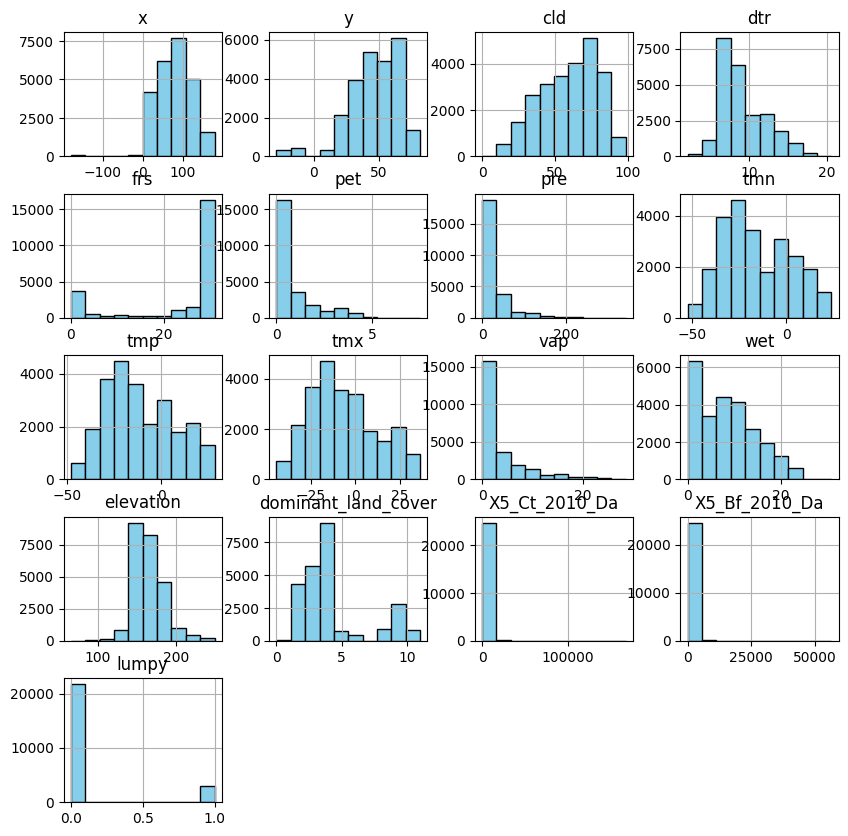

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10) , color='skyblue', edgecolor='black')
plt.show()

 Many features appear to be skewed (not normally distributed). Skewed data might need transformations

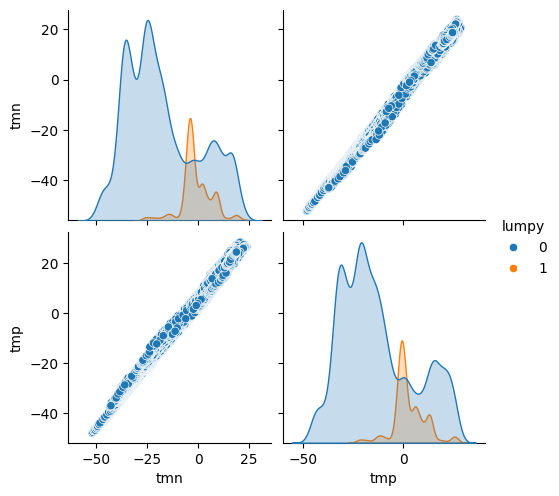

In [ ]:
sns.pairplot(df[['tmn', 'tmp', 'lumpy']], hue='lumpy') # Consider more features as needed
plt.show()

strong positive linear correlation between 'tmn' (minimum temperature) and 'tmp' (temperature)

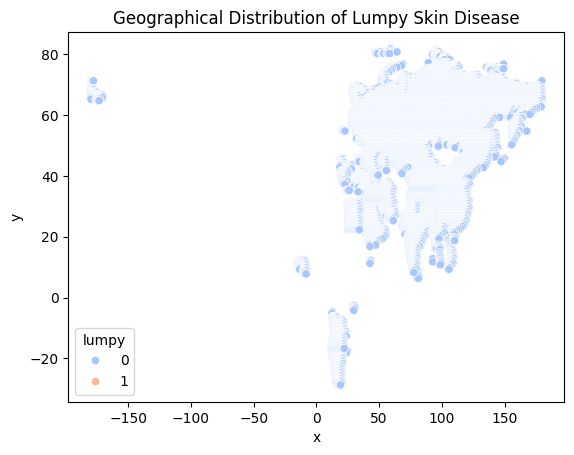

In [ ]:
sns.scatterplot(data=df, x='x', y='y', hue='lumpy', palette='coolwarm')
plt.title('Geographical Distribution of Lumpy Skin Disease')
plt.show()

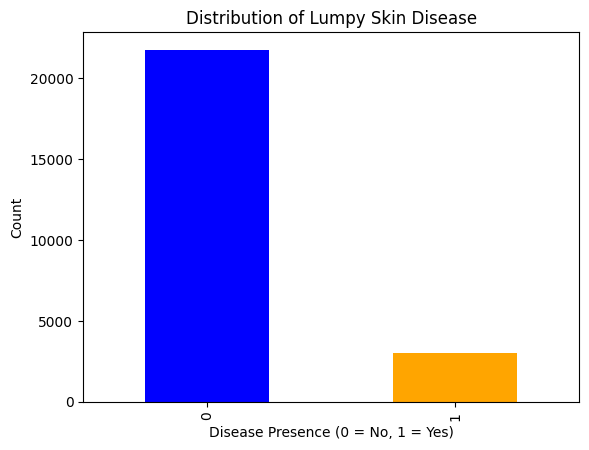

In [ ]:
import matplotlib.pyplot as plt
df['lumpy'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Lumpy Skin Disease')
plt.xlabel('Disease Presence (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df.drop('lumpy', axis=1)
y = df['lumpy']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Model_1_Logistic Regression: A good baseline model for binary classification

In [ ]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LR = LogisticRegression()
LR.fit(x1_train, y1_train)
print('Training Accuracy : ', LR.score(x1_train, y1_train))
print('Testing Accuracy : ', LR.score(x1_test, y1_test))

Training Accuracy :  0.9479891140006048
Testing Accuracy :  0.9457770610763959


In [ ]:
y_pred_1 = LR.predict(x1_test)
print(classification_report(y1_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4354
           1       0.78      0.77      0.78       607

    accuracy                           0.95      4961
   macro avg       0.88      0.87      0.87      4961
weighted avg       0.95      0.95      0.95      4961



In [ ]:
conf = confusion_matrix(y1_test, y_pred_1)
conf

array([[4226,  128],
       [ 141,  466]])

## Another_Model

In [ ]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Train models
rf = RandomForestClassifier(random_state=42)
rf.fit(x2_train, y2_train)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x2_train, y2_train)

svc = SVC(probability=True, random_state=42)
svc.fit(x2_train, y2_train)

# Evaluate all models
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'SVC': svc}
for name, model in models.items():
    y_pred2 = model.predict(x2_test)
    print(f"Model: {name}")
    print(classification_report(y2_test, y_pred2))
    print(confusion_matrix(y2_test, y_pred2))
    print()

Model: Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4354
           1       0.84      0.91      0.87       607

    accuracy                           0.97      4961
   macro avg       0.91      0.94      0.93      4961
weighted avg       0.97      0.97      0.97      4961

[[4248  106]
 [  55  552]]

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4354
           1       0.91      0.85      0.88       607

    accuracy                           0.97      4961
   macro avg       0.94      0.92      0.93      4961
weighted avg       0.97      0.97      0.97      4961

[[4303   51]
 [  92  515]]

Model: SVC
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4354
           1       0.85      0.80      0.82       607

    accuracy                           0.96      4961
   macro avg   

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x2_train, y2_train)
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Mean accuracy:", scores.mean())

Mean accuracy: 0.8576790416864446


## SMOTE

In [ ]:
x3_train , x3_test , y3_train , y3_test = train_test_split(X , y , test_size= 0.2 , random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto' , random_state=42)

x3_train_resampled, y3_train_resampled = smote.fit_resample(x3_train, y3_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, max_depth = 20, min_samples_split = 10  , random_state=42)
RF.fit(x3_train_resampled, y3_train_resampled)
print('Training Accuracy : ', RF.score(x3_train_resampled, y3_train_resampled))
print('Testing Accuracy : ', RF.score(x3_test, y3_test))

Training Accuracy :  0.9922458357265939
Testing Accuracy :  0.9641201370691392


In [ ]:
y_pred_3 = RF.predict(x3_test)
print(classification_report(y3_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4354
           1       0.80      0.94      0.87       607

    accuracy                           0.96      4961
   macro avg       0.90      0.96      0.92      4961
weighted avg       0.97      0.96      0.97      4961



## PCA

In [ ]:
X2 = df.drop('lumpy', axis=1)
y2= df['lumpy']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X2)
X_pca

array([[ 2.75526315e+04, -9.10141143e+02,  6.02421809e+01, ...,
        -4.92637517e+00, -4.08064821e+00,  6.40278628e-01],
       [ 2.41985243e+04, -3.42497367e+03,  4.88718077e+01, ...,
        -1.55360390e+00, -5.16157265e+00,  2.19935452e-01],
       [ 5.54114527e+03,  3.72848940e+02,  3.68654850e+00, ...,
         5.48424489e+00, -5.09540953e+00,  5.61891755e-01],
       ...,
       [-5.39592898e+02, -8.48030442e+01, -1.51326883e+02, ...,
        -1.78000803e+01, -4.59343899e+00,  5.79814879e+00],
       [-5.45496286e+02, -8.38480254e+01, -1.51946208e+02, ...,
        -1.72137052e+01, -4.36951918e+00,  6.00201647e+00],
       [-5.63920484e+02, -8.08548845e+01, -1.52851767e+02, ...,
        -1.68978109e+01, -4.09149112e+00,  6.29950292e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(X_pca, y2, test_size=0.2, random_state=42)

In [ ]:
RF = RandomForestClassifier(n_estimators=200, max_depth = 20, min_samples_split = 10  , random_state=4)
RF.fit(x4_train, y4_train)
print('Training Accuracy : ', RF.score(x4_train, y4_train))
print('Testing Accuracy : ', RF.score(x4_test, y4_test))

Training Accuracy :  0.9877028525350268
Testing Accuracy :  0.9691594436605523


In [ ]:
y_pred4 = RF.predict(x4_test)
print(classification_report(y4_test, y_pred4))
confu = confusion_matrix(y4_test, y_pred4)
confu

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4354
           1       0.87      0.88      0.87       607

    accuracy                           0.97      4961
   macro avg       0.93      0.93      0.93      4961
weighted avg       0.97      0.97      0.97      4961



array([[4273,   81],
       [  72,  535]])